# DoorDash Dasher Earnings Analysis

# *THIS PROJECT IS ONGOING AS ADDITIONAL DATA IS BEING COLLECTED. RESULTS ARE NOT YET FINALIZED*

## Table of Contents
* Project Goals
* About the Data
* Load and Inspect the Data
* Clean the Data
* Exploratory Data Analysis
    * Summary Statistics
    * Visualize the Data
    * Explore Relationships
* Data Analysis
    * One Sample T-Test
    * Multiple Regression Analysis
    * ANOVA Tests
    * Principle Component Analysis (PCA)
* Conclusions
    * Note To Readers
    * Limitations of the Data
    * Findings

## Project Goals
The primary goal of this analysis is to determine what actions a dasher can take to maximize their earnings potential. To achieve this goal, the analysis needs to determine which variables have the strongest correlation with dasher earnings.

## About the Data
The data consists of 3 datasets:
* Weekly Earnings (`weekly_earnings`)
* Delivery Informtaion (`deliveries`)
* Shifts (`shift_data`)

The `weekly_earnings` data was collected from the account of the dasher. It contains data from 14 weeks of dashing, including total pay, number of orders completed, time spent dashing, along with a variety of calculated fields.

The `deliveries` data was collected through a data archive request performed by the dasher directly from DoorDash. It contains detailed data about individual orders the dasher completed such as the restaurant name, order subtotal, number of items on the order, etc.

The `shift_data` data was collected manually. It consists of data from individual shifts including dasher ratings, day and time of the shift, shift earnings, hourly rates, number of orders completed, and more. This dataset contains additional data that was not available in the `weekly_earnings`, but that are presumed important variables in determining a dasher's earnings potential (DoorDash policy indicates that dashers with higher earnings are given priority access to higher paying orders, a claim this analysis will test for truthfulness).

A data dictionary for each dataset is available in the GitHub repository for this project.

## Load and Inspect the Data
Read in and inspect the data to verify structure, datatypes, determine if cleaning is necessary, etc. The data collection process was designed with this analysis in mind, so it should need minimal (if any) cleaning.

In [1]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# read in data
weekly_earnings = pd.read_csv('doordash_weekly_data.csv')

# preview the data
weekly_earnings.columns

Index(['week', 'total_earnings', 'doordash_pay', 'tips', 'pct_pay_dd',
       'pct_pay_tips', 'total_hours', 'total_mins', 'active_hours',
       'active_mins', 'pct_hours_active', 'total_pay_per_hour',
       'active_pay_per_hour', 'miles_driven', 'orders_completed',
       'pay_per_order', 'tip_per_order', 'dd_pay_per_order', 'orders_per_hour',
       'avg_order_mileage', 'total_pay_per_mile', 'dd_pay_per_mile',
       'tip_per_mile', 'dash_time_mins_prev_week',
       'active_time_mins_prev_week'],
      dtype='object')

In [3]:
# read in data
deliveries = pd.read_csv('dasher_delivery_information.csv')

# preview the data
deliveries.head()

,ORDER_CREATED_TIME,ACTUAL_PICKUP_TIME,ACTUAL_DELIVERY_TIME,STORE_NAME,TOTAL_ITEM_COUNT,SUBTOTAL_IN_CENTS,ORDER_STATUS
0,2021-07-11 02:08:17.359928000,2021-07-11 02:43:49.785390000,2021-07-11 03:03:30.907955000,Zen Teriyaki,2,1748.0,Order Delivered
1,2021-07-11 02:11:55.936382000,2021-07-11 02:28:54.530730000,2021-07-11 02:54:09.421416000,Red Robin (41),3,3221.0,Order Delivered
2,2021-07-11 02:50:05.767197000,2021-07-11 03:25:25.493766000,2021-07-11 03:40:04.003225000,Azteca Mexican Restaurant (Beaverton),7,3325.0,Order Delivered
3,2021-07-11 03:49:31.971501000,2021-07-11 04:01:41.677837000,2021-07-11 04:17:14.364960000,Dairy Queen (16068),2,2123.0,Order Delivered
4,2021-07-11 04:17:49.861269000,2021-07-11 04:31:09.279592000,2021-07-11 04:36:55.333893000,Chipotle (Washington Square),2,1955.0,Order Delivered


In [4]:
# check datatypes
weekly_earnings.dtypes

week                            int64
total_earnings                 object
doordash_pay                  float64
tips                          float64
pct_pay_dd                    float64
pct_pay_tips                  float64
total_hours                   float64
total_mins                      int64
active_hours                  float64
active_mins                     int64
pct_hours_active              float64
total_pay_per_hour            float64
active_pay_per_hour           float64
miles_driven                    int64
orders_completed                int64
pay_per_order                 float64
tip_per_order                 float64
dd_pay_per_order              float64
orders_per_hour               float64
avg_order_mileage             float64
total_pay_per_mile            float64
dd_pay_per_mile               float64
tip_per_mile                  float64
dash_time_mins_prev_week        int64
active_time_mins_prev_week      int64
dtype: object

In [5]:
# check for missing data
weekly_earnings.isna().sum()

week                          0
total_earnings                0
doordash_pay                  0
tips                          0
pct_pay_dd                    0
pct_pay_tips                  0
total_hours                   0
total_mins                    0
active_hours                  0
active_mins                   0
pct_hours_active              0
total_pay_per_hour            0
active_pay_per_hour           0
miles_driven                  0
orders_completed              0
pay_per_order                 0
tip_per_order                 0
dd_pay_per_order              0
orders_per_hour               0
avg_order_mileage             0
total_pay_per_mile            0
dd_pay_per_mile               0
tip_per_mile                  0
dash_time_mins_prev_week      0
active_time_mins_prev_week    0
dtype: int64

In [6]:
# check for missing data
deliveries.isna().sum()

ORDER_CREATED_TIME      0
ACTUAL_PICKUP_TIME      0
ACTUAL_DELIVERY_TIME    0
STORE_NAME              0
TOTAL_ITEM_COUNT        0
SUBTOTAL_IN_CENTS       0
ORDER_STATUS            0
dtype: int64

There is no missing data. The `total_earnings` column in the `weekly_earnings` DataFrame was read in as an object type, and needs to be converted to a numeric type.

## Clean the Data

In [7]:
# inspect total_earnings column
weekly_earnings['total_earnings']

0       996.47
1       828.38
2       991.24
3       603.25
4       877.79
5       762.99
6       878.91
7       959.72
8       656.53
9     1,053.65
10    1,033.61
11      860.51
12      718.01
13      903.27
Name: total_earnings, dtype: object

The commas are likely causing the issue. They need to be removed.

In [8]:
# remove commas
weekly_earnings['total_earnings'] = weekly_earnings['total_earnings'].str.replace(',', '')

# inspect total_earnings column
weekly_earnings['total_earnings']

0      996.47
1      828.38
2      991.24
3      603.25
4      877.79
5      762.99
6      878.91
7      959.72
8      656.53
9     1053.65
10    1033.61
11     860.51
12     718.01
13     903.27
Name: total_earnings, dtype: object

In [9]:
# convert total_earnings column to numeric type
weekly_earnings['total_earnings'] = weekly_earnings['total_earnings'].astype(float)

# check dtypes
weekly_earnings.dtypes

week                            int64
total_earnings                float64
doordash_pay                  float64
tips                          float64
pct_pay_dd                    float64
pct_pay_tips                  float64
total_hours                   float64
total_mins                      int64
active_hours                  float64
active_mins                     int64
pct_hours_active              float64
total_pay_per_hour            float64
active_pay_per_hour           float64
miles_driven                    int64
orders_completed                int64
pay_per_order                 float64
tip_per_order                 float64
dd_pay_per_order              float64
orders_per_hour               float64
avg_order_mileage             float64
total_pay_per_mile            float64
dd_pay_per_mile               float64
tip_per_mile                  float64
dash_time_mins_prev_week        int64
active_time_mins_prev_week      int64
dtype: object

The data has been cleaned and is ready for exploratory data analysis.

## Exploratory Data Analysis
This portion of the project seeks to develop a deeper understanding of the data through summary statistics and visualizations as well as exploring relationships between variables to form hypotheses relating to the main goal of this analysis.

### Summary Statistics

In [10]:
# view summary stats
weekly_earnings.describe()

,week,total_earnings,doordash_pay,tips,pct_pay_dd,pct_pay_tips,total_hours,total_mins,active_hours,active_mins,...,pay_per_order,tip_per_order,dd_pay_per_order,orders_per_hour,avg_order_mileage,total_pay_per_mile,dd_pay_per_mile,tip_per_mile,dash_time_mins_prev_week,active_time_mins_prev_week
count,14.0000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,...,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000
mean,7.5000,866.023571,333.110714,532.912857,0.389429,0.610571,25.537857,1534.285714,19.366429,1162.142857,...,15.504286,9.905714,6.455000,2.121429,6.836429,2.284286,0.945714,1.465000,1516.214286,1163.714286
std,4.1833,139.604942,51.091427,116.269629,0.058193,0.058193,3.289099,199.734219,2.702866,162.176000,...,3.437937,1.903958,1.093285,0.142389,0.600687,0.550353,0.144367,0.340492,184.619850,163.393074
min,1.0000,603.250000,261.250000,323.160000,0.297000,0.492000,20.460000,1228.000000,15.860000,952.000000,...,5.580000,6.780000,5.170000,1.900000,5.900000,0.830000,0.740000,0.910000,1228.000000,952.000000
25%,4.2500,779.337500,285.712500,454.282500,0.341250,0.575750,22.907500,1374.500000,17.007500,1020.500000,...,14.817500,8.565000,5.752500,2.000000,6.400000,2.185000,0.887500,1.265000,1374.500000,1020.500000
50%,7.5000,878.350000,332.695000,554.020000,0.387500,0.612500,25.085000,1505.500000,19.230000,1154.000000,...,16.570000,9.675000,6.140000,2.150000,6.755000,2.290000,0.930000,1.435000,1505.500000,1154.000000
75%,10.7500,983.360000,380.402500,616.520000,0.424250,0.658750,28.827500,1730.000000,21.515000,1291.250000,...,17.195000,11.315000,6.785000,2.200000,7.392500,2.600000,0.965000,1.615000,1686.250000,1295.500000
max,14.0000,1053.650000,417.930000,699.860000,0.508000,0.703000,30.010000,1801.000000,23.930000,1436.000000,...,19.980000,14.040000,8.790000,2.400000,7.780000,3.050000,1.310000,2.140000,1796.000000,1436.000000


Most of the columns are aggregated from parent columns. Check for outliers and other attributes with boxplots of the parent columns. The parent columns are:
* total_earnings
* doordash_pay
* tips
* total_hours
* active_hours
* miles_driven
* orders_completed

### Visualize the Data
This section helps visualize the attributes of the primary variables this analysis is interested in. Because the data is limited to just 14 records, distribution plots are not going to be very helpful in visualizing the data. Instead, boxplots are used to easily visualize spread, outliers, etc of key variables we are interested in.

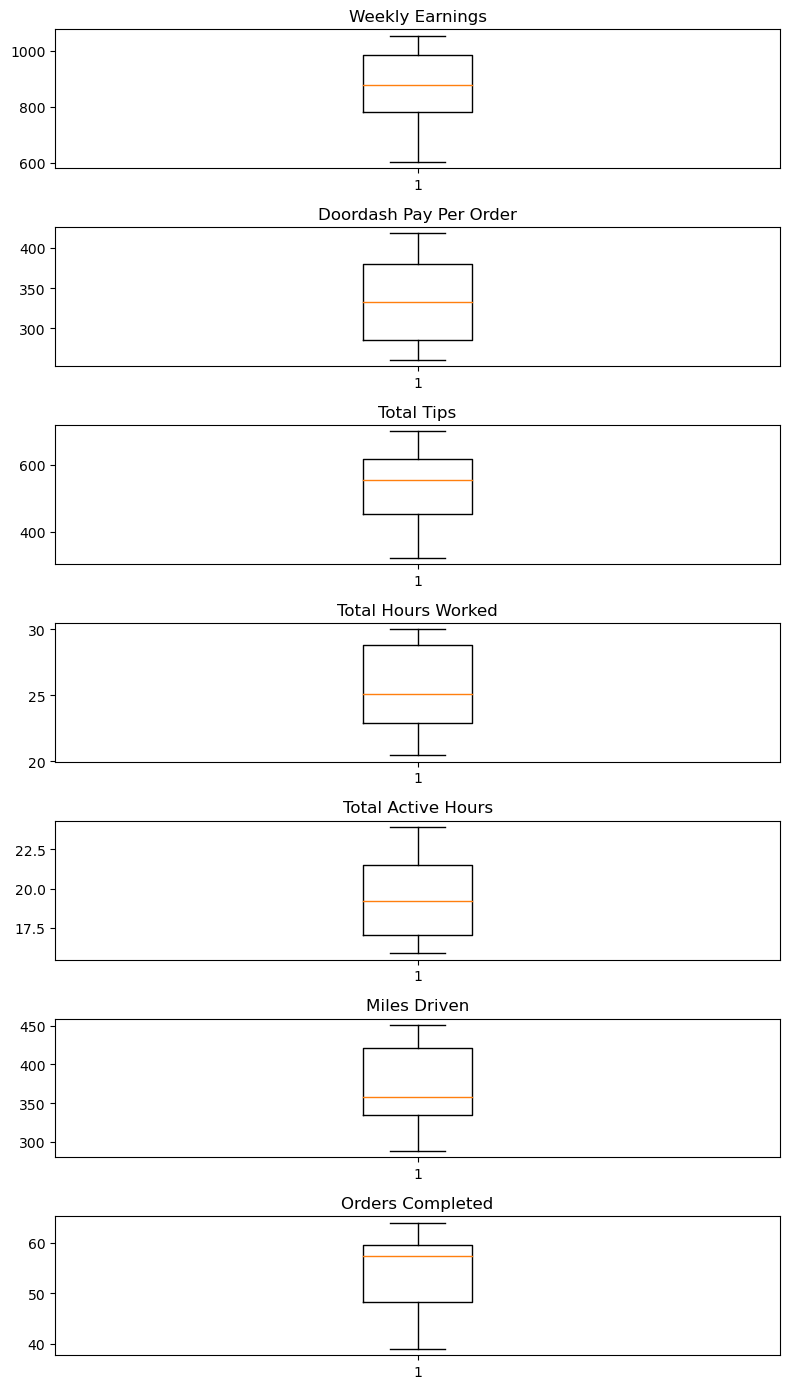

In [11]:
# set subplot num
num_subplots = 7

# store data for all boxplots
boxplot_data = [weekly_earnings['total_earnings'], weekly_earnings['doordash_pay'], weekly_earnings['tips'], weekly_earnings['total_hours'], weekly_earnings['active_hours'], weekly_earnings['miles_driven'], weekly_earnings['orders_completed']]
boxplot_titles = ['Weekly Earnings', 'Doordash Pay Per Order', 'Total Tips', 'Total Hours Worked', 'Total Active Hours', 'Miles Driven', 'Orders Completed']

# create the figure
fig, axs = plt.subplots(7, 1, figsize=(8, 14))

# plot all boxplots
for i, ax in enumerate(axs.flatten()):
    ax.boxplot(boxplot_data[i])
    ax.set_title(boxplot_titles[i])
    ax.set_xlim([0.5, 1.5])

fig.tight_layout()
plt.show()

There are no outliers in the parent columns, leading us to reasonably assume there are no outliers in the aggregate columns either. We now want to visualize temporal data. Rather than charting the parent columns which are highly subject to variables such as `hours_worked`, we will chart their "per_order" counterparts. This will remove flucuation based on time spent working and provide a more accurate account of change of these variables over time. This is more logical as dashers earn on a per-order basis.

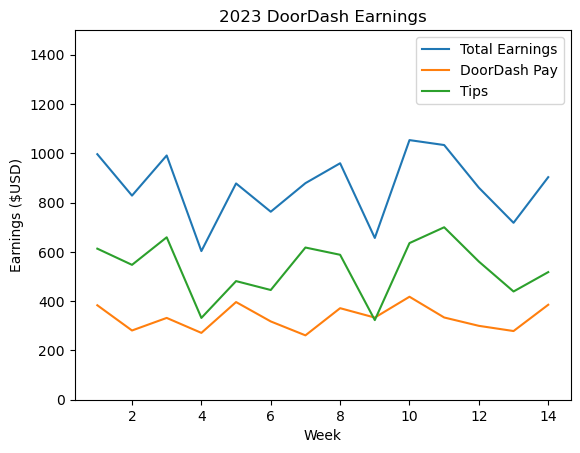

In [12]:
# plot earnings by week
plt.plot('week', 'total_earnings', data=weekly_earnings)
plt.plot('week', 'doordash_pay', data=weekly_earnings)
plt.plot('week', 'tips', data=weekly_earnings)
plt.title('2023 DoorDash Earnings')
plt.xlabel('Week')
plt.ylabel('Earnings ($USD)')
plt.legend(['Total Earnings', 'DoorDash Pay', 'Tips'])
plt.ylim(0,1500)
plt.show()

There is a lot of flucuation, but no clear trend in earnings. This is not the best way to represent earnings data because of the wide range of hours worked per week. Plot pay per hour for a better visualization of the trend in earnings.

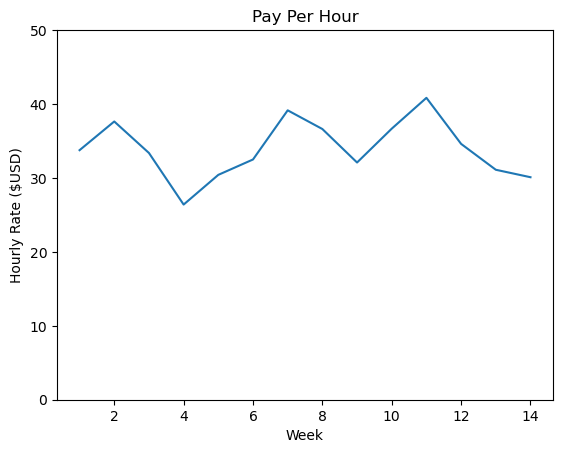

In [13]:
# plot hourly rates over time
plt.plot('week', 'total_pay_per_hour', data=weekly_earnings)
plt.title('Pay Per Hour')
plt.xlabel('Week')
plt.ylabel('Hourly Rate ($USD)')
plt.ylim(0,50)
plt.show()

There is a pattern of flucuation for total earnings. The general pattern appears to be 2 weeks of decreasing hourly rates, followed by a 2-4 week period of consistent increase in hourly rates. More data will be necessary to verify this pattern. Ongoing data collection will help determine whether this pattern holds true.

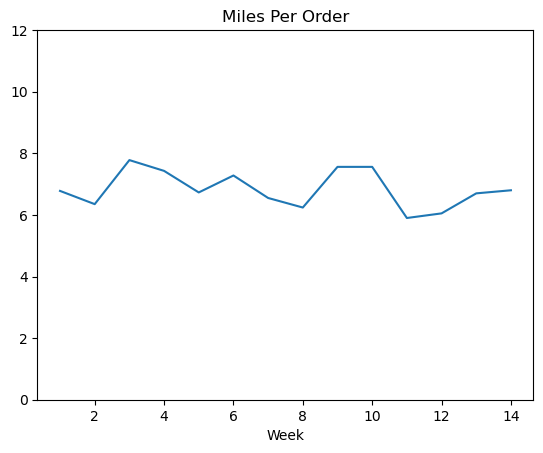

In [14]:
# plot miles_driven over time
plt.plot('week', 'avg_order_mileage', data=weekly_earnings)
plt.title('Miles Per Order')
plt.xlabel('Week')
plt.ylim(0,12)
plt.show()

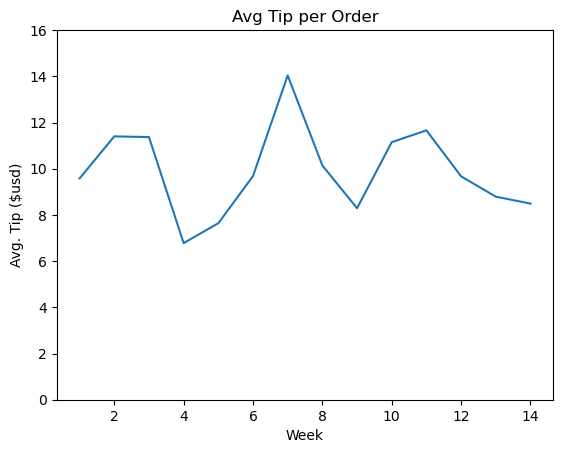

In [15]:
# plot tip_per_order
plt.plot('week', 'tip_per_order', data=weekly_earnings)
plt.ylabel('Avg. Tip ($usd)')
plt.xlabel('Week')
plt.title('Avg Tip per Order')
plt.ylim(0,16)
plt.show()

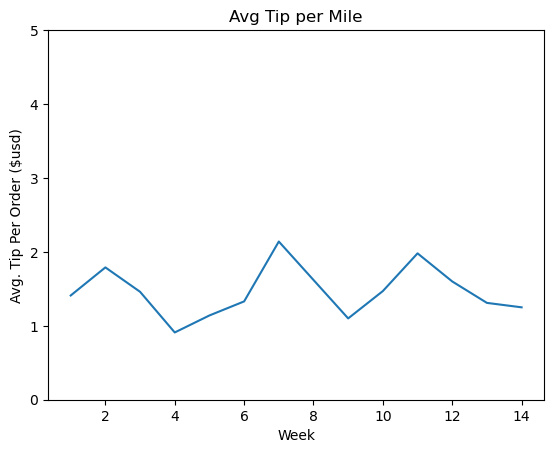

In [16]:
# plot tip_per_mile
plt.plot('week', 'tip_per_mile', data=weekly_earnings)
plt.ylabel('Avg. Tip Per Order ($usd)')
plt.xlabel('Week')
plt.title('Avg Tip per Mile')
plt.ylim(0,5)
plt.show()

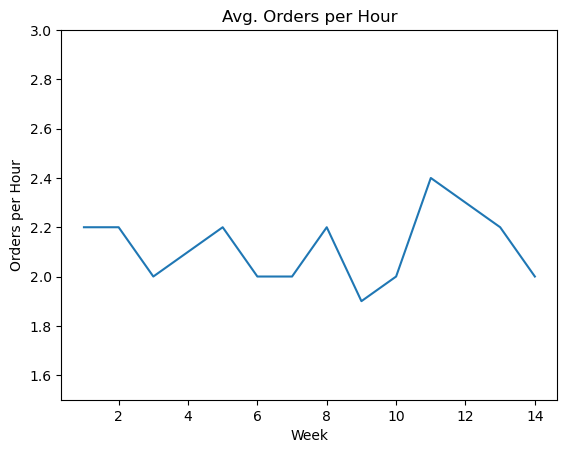

In [17]:
# plot order per hour
plt.plot('week', 'orders_per_hour', data=weekly_earnings)
plt.ylabel('Orders per Hour')
plt.xlabel('Week')
plt.title('Avg. Orders per Hour')
plt.ylim(1.5,3)
plt.show()

Observing temporal data reveals similar patterns of flucutation, but with no clear negative or positive trend. A more granular analysis of these variables is required to determine patterns in the data.

### Exploring Relationships
This section explores the relationships between variables. The main variable this project is interested is the dasher's hourly earnings (`total_pay_per_hour`). By exploring the relationships between this variable and other variables in the dataset, we can achieve the main goal of this project, determining which variables have the strongest correlation to a dasher's hourly earnings.

The Pearson Correlation Coefficient will be the primary metric to measure relationships in this analysis.

#### Correlations With Hourly Rate

In [18]:
# calculate correlations
corr = weekly_earnings.corr()['total_pay_per_hour'].sort_values(ascending=False)

# print list of correlations
corr

total_pay_per_hour            1.000000
tip_per_mile                  0.933794
tip_per_order                 0.880054
total_pay_per_mile            0.768253
tips                          0.763597
pct_pay_tips                  0.733404
active_pay_per_hour           0.660602
total_earnings                0.630278
pay_per_order                 0.612244
pct_hours_active              0.373360
orders_per_hour               0.322052
week                          0.047259
active_mins                   0.044400
active_hours                  0.044257
orders_completed              0.036102
dd_pay_per_mile               0.033542
doordash_pay                 -0.015526
active_time_mins_prev_week   -0.030550
dash_time_mins_prev_week     -0.059367
total_mins                   -0.076554
total_hours                  -0.077169
dd_pay_per_order             -0.220523
miles_driven                 -0.261226
avg_order_mileage            -0.519756
pct_pay_dd                   -0.733404
Name: total_pay_per_hour,

As expected, the fields with the strongest correlations include tips per order, pay per mile, and other aggregate columns. Although these variables are important, this analysis is primarily interested in columns that a dasher directly has influence over, such as hours worked, and dasher ratings (to be explored later).

#### Previous Week Dash Time vs. Current Week Hourly Rate
One question we want to answer is whether the amount of time spent dashing the previous week has any correlation with the hourly rate of the current week. To examine this relationship, hourly rate and previous week dash time are plotted against each other.

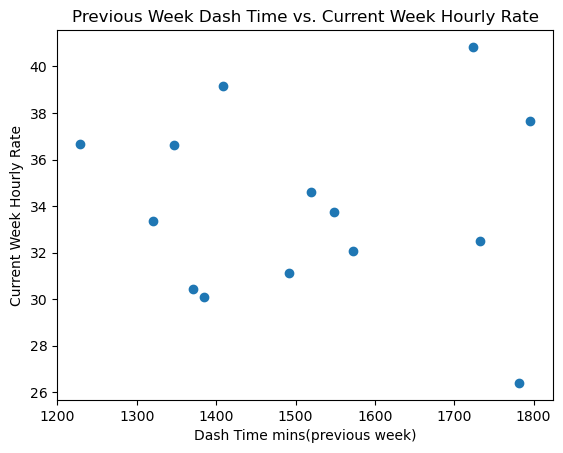

In [19]:
# set x and y values
x = weekly_earnings['dash_time_mins_prev_week']
y = weekly_earnings['total_pay_per_hour']

# plot hourly rates against previous week dash time
plt.scatter(x, y)
plt.title('Previous Week Dash Time vs. Current Week Hourly Rate')
plt.xlabel('Dash Time mins(previous week)')
plt.ylabel('Current Week Hourly Rate')
plt.show()

There appears to be little to no correlation between time spent dashing the previous week, and the current week's average hourly rate. The Pearson Coefficient is calculated to verify this.

In [20]:
# pearon coefficient
p_coef = weekly_earnings['dash_time_mins_prev_week'].corr(weekly_earnings['total_pay_per_hour'])
p_coef

-0.05936740233616406

Interestingly, there is a very weak (essentially non-existent) negative correlation. There appears to be an outlier in the bottom right. It will be removed and plotted again, with a new coefficient.

In [21]:
# create a new temp df without the row containing the outlier in the hourly rate column
temp_df = weekly_earnings.drop(weekly_earnings[weekly_earnings['total_pay_per_hour'] < 28].index)

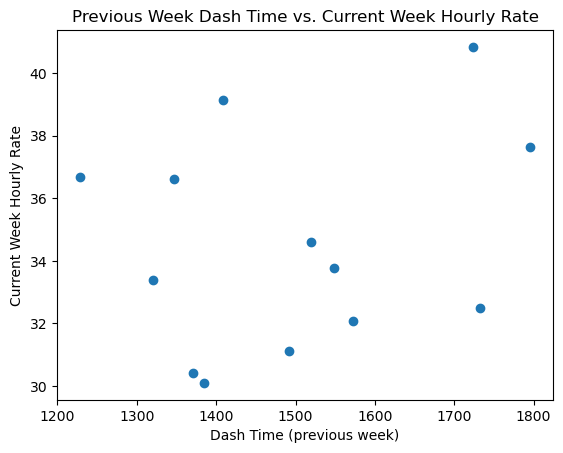

In [22]:
# set x and y values
x = temp_df['dash_time_mins_prev_week']
y = temp_df['total_pay_per_hour']

# replot hourly rates against previous week dash time without outlier
plt.scatter(x, y)
plt.title('Previous Week Dash Time vs. Current Week Hourly Rate')
plt.xlabel('Dash Time (previous week)')
plt.ylabel('Current Week Hourly Rate')
plt.show()

In [23]:
# pearon coefficient
p_coef = temp_df['dash_time_mins_prev_week'].corr(temp_df['total_pay_per_hour'])

p_coef

0.22322433140064266

With the outlier removed, there is now a slightly stronger (though still very weak) positive correlation between time spent dashing the previous week, and the current week's average hourly rate.

#### Previous Week Total Earnings vs. Current Week Hourly Rate
Now the relationship between total earnings from the prior week and hourly rate from the current week is examined. A new column is added to each row containing the total earnings from the prior week.

In [24]:
# create new column with the previous week's total earnings
weekly_earnings['last_week_earnings'] = weekly_earnings['total_earnings'].shift(1)

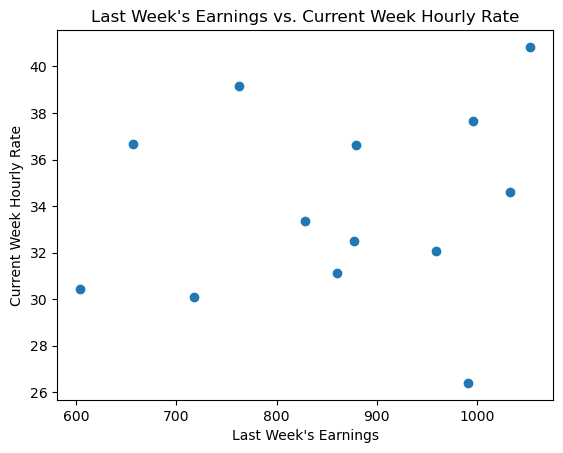

In [25]:
# set x and y values
x = weekly_earnings['last_week_earnings']
y = weekly_earnings['total_pay_per_hour']

# plot hourly rates against previous week dash time
plt.scatter(x, y)
plt.title('Last Week\'s Earnings vs. Current Week Hourly Rate')
plt.xlabel('Last Week\'s Earnings')
plt.ylabel('Current Week Hourly Rate')
plt.show()

In [26]:
# pearon coefficient for 
p_coef = weekly_earnings['last_week_earnings'].corr(weekly_earnings['total_pay_per_hour'])
p_coef

0.17018228244119113

There is a very weak positive correlation between the previous week's earnings and the current week's hourly rate. Not very notable. Again, there is the outlier in the bottom right of the graph. Let's remove this and replot, as well as recalculate the coefficient.

In [27]:
# create new df without outlier
temp_df = weekly_earnings.drop(weekly_earnings[weekly_earnings['total_pay_per_hour'] < 28].index)

# create new column with the previous week's total earnings
temp_df['last_week_earnings'] = temp_df['total_earnings'].shift(1)

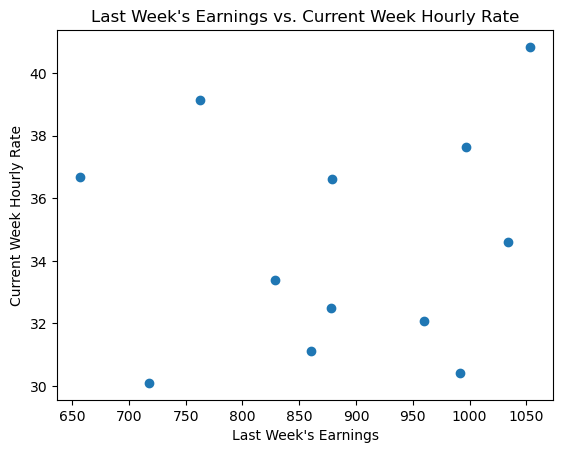

In [28]:
# set x and y values
x = temp_df['last_week_earnings']
y = temp_df['total_pay_per_hour']

# plot hourly rates against previous week dash time
plt.scatter(x, y)
plt.title('Last Week\'s Earnings vs. Current Week Hourly Rate')
plt.xlabel('Last Week\'s Earnings')
plt.ylabel('Current Week Hourly Rate')
plt.show()

In [29]:
# pearon coefficient for 
p_coef = temp_df['total_pay_per_hour'].corr(temp_df['last_week_earnings'])
p_coef

0.12862805420657825

Removing the outlier created an even weaker positive correlation between the previous week's earnings and the current week's hourly rate.

#### Previous Week Hourly Rate vs Current Week Hourly Rate
The final relationship we want to explore is between the hourly rates from the previous week and the hourly rate from the current week.

To start, a new column to store the previous week's hourly rate is created.

In [30]:
# create new column for the previous week's hourly earnings
weekly_earnings['prev_week_hourly'] = weekly_earnings['total_pay_per_hour'].shift(1)

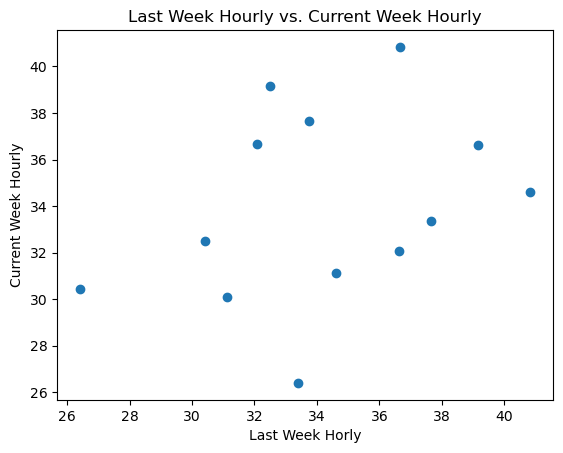

In [31]:
# set x and y values
x = weekly_earnings['prev_week_hourly']
y = weekly_earnings['total_pay_per_hour']

# plot the relationship
plt.scatter(x, y)
plt.title('Last Week Hourly vs. Current Week Hourly')
plt.xlabel('Last Week Horly')
plt.ylabel('Current Week Hourly')
plt.show()

In [32]:
hourly_coef = weekly_earnings['total_pay_per_hour'].corr(weekly_earnings['prev_week_hourly'])
hourly_coef

0.3202950448600604

There is a weak positive correlation between the previous week's hourly earnings and the current week's hourly earnings.

### Other Correlations
There are other variables with correlations we want to examine. These are the variables that are strongly correlated to the average hourly rate, but which the dasher has no control over. These include:
* Customer Tips
* DoorDash Pay Per Order

In order to maximize earnings potential, we need to detemrine which variables (if any) are associated with higher tips. Tips are measured because they represent roughly 61% of dasher's total earnings.

#### Correlations With Customer Tips

In [33]:
# calculate corr with tips
tips_corr = weekly_earnings.corr()['tips'].sort_values(ascending=False)
tips_corr

tips                          1.000000
total_earnings                0.936366
pct_pay_tips                  0.800499
total_pay_per_hour            0.763597
tip_per_order                 0.760002
tip_per_mile                  0.757908
total_pay_per_mile            0.594768
active_mins                   0.583770
active_hours                  0.583752
orders_completed              0.566741
active_pay_per_hour           0.553604
total_mins                    0.526873
total_hours                   0.526651
pay_per_order                 0.487675
miles_driven                  0.361672
orders_per_hour               0.357529
pct_hours_active              0.320109
doordash_pay                  0.282859
prev_week_hourly              0.239414
week                         -0.028720
last_week_earnings           -0.127295
dd_pay_per_mile              -0.292755
dash_time_mins_prev_week     -0.372260
active_time_mins_prev_week   -0.376874
avg_order_mileage            -0.379453
dd_pay_per_order         

There are several strong correlations with customer tips, but most are obvious. For example, the more orders a dasher completes, the more tips they are likely to recieve. Additionally, the more orders completed, the more miles driven. We can thus conclude that the more miles driven, the more tips a dasher is likely to recieve. This does not mean driving more miles leads to more tips.

When analyzing relationships involving customer tips, a better variable that controls for the disparities attributed to increased hours worked and orders completed is the `tip_per_order` variable.

In [34]:
# calculate corr with tip_per_order
tpo_corr = weekly_earnings.corr()['tip_per_order'].sort_values(ascending=False)
tpo_corr

tip_per_order                 1.000000
tip_per_mile                  0.921928
total_pay_per_hour            0.880054
pct_pay_tips                  0.842792
tips                          0.760002
total_pay_per_mile            0.685622
pay_per_order                 0.632147
active_pay_per_hour           0.583789
total_earnings                0.566483
pct_hours_active              0.273586
prev_week_hourly              0.211380
active_hours                  0.036803
active_mins                   0.036636
orders_per_hour               0.023915
last_week_earnings            0.003603
total_hours                  -0.041720
total_mins                   -0.043025
week                         -0.070213
orders_completed             -0.091404
dd_pay_per_mile              -0.122844
dash_time_mins_prev_week     -0.171835
doordash_pay                 -0.181659
active_time_mins_prev_week   -0.193706
miles_driven                 -0.211873
dd_pay_per_order             -0.251837
avg_order_mileage        

This reveals a few interesting relationships to examine more closely:
* `prev_week_hourly`
* `avg_order_mileage`

These variables are plotted against `tip_per_order`.

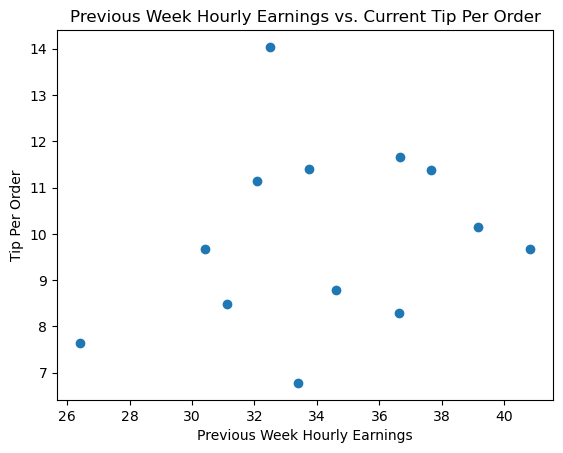

In [35]:
# set x and y values
x = weekly_earnings['prev_week_hourly']
y = weekly_earnings['tip_per_order']

# plot hourly rates against previous week dash time
plt.scatter(x, y)
plt.title('Previous Week Hourly Earnings vs. Current Tip Per Order')
plt.xlabel('Previous Week Hourly Earnings')
plt.ylabel('Tip Per Order')
plt.show()

As revealed in the EDA portion of this project, a dasher's earnings potential is strongly and positively correlated with customer tips. What proportion of a dashers pay is attributed to tips versus DoorDash pay?

In [36]:
# proptoion of dd pay
avg_prop_dd_pay = weekly_earnings['pct_pay_dd'].mean()
avg_prop_tips = weekly_earnings['pct_pay_tips'].mean()

avg_prop_dd_pay, avg_prop_tips

(0.3894285714285714, 0.6105714285714285)

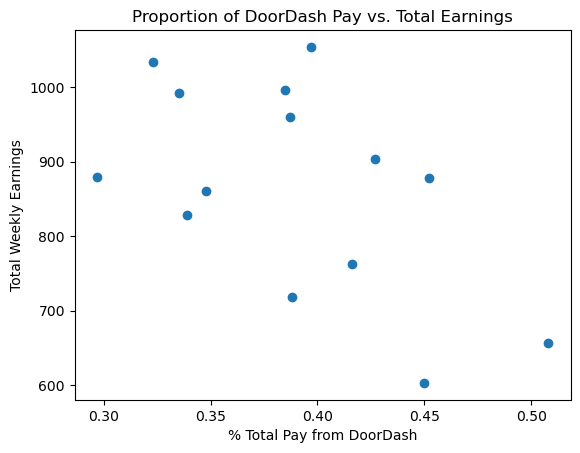

In [37]:
# set x and y values
x = weekly_earnings['pct_pay_dd']
y = weekly_earnings['total_earnings']

# plot pct doordash pay against total earnings
plt.scatter(x, y)
plt.title('Proportion of DoorDash Pay vs. Total Earnings')
plt.xlabel('% Total Pay from DoorDash')
plt.ylabel('Total Weekly Earnings')
plt.show()

On average, DoorDash pays the dasher around 39% of their total earnings, with the remaining 61% coming from customer tips. In general, as the proportion of total pay that comes from DoorDash increases, total earnings decrease.

In [38]:
weekly_earnings.columns

Index(['week', 'total_earnings', 'doordash_pay', 'tips', 'pct_pay_dd',
       'pct_pay_tips', 'total_hours', 'total_mins', 'active_hours',
       'active_mins', 'pct_hours_active', 'total_pay_per_hour',
       'active_pay_per_hour', 'miles_driven', 'orders_completed',
       'pay_per_order', 'tip_per_order', 'dd_pay_per_order', 'orders_per_hour',
       'avg_order_mileage', 'total_pay_per_mile', 'dd_pay_per_mile',
       'tip_per_mile', 'dash_time_mins_prev_week',
       'active_time_mins_prev_week', 'last_week_earnings', 'prev_week_hourly'],
      dtype='object')

## Data Analysis
### One Sample T-Test
The dasher felt there was a significant drop in earnings potential for weeks 12 and 13 relative to weeks 1-11. To determine whether this is true, a one sample t-test will be conducted. The metric will be `total_pay_per_hour`, as `total_earnings` is influenced more heavily by factors that flucuate vastly like orders completed and hours worked. The hypotheses are as follows:
* H(0) - there was a significant drop in earnings in recent weeks
* H(1) - there was not a significant drop in earnings in recent weeks

In [39]:
# import libraries
from scipy.stats import ttest_1samp

In [40]:
# split data
prev_12_weeks = weekly_earnings[weekly_earnings['week'] <= 12]['total_pay_per_hour']
recent_2_weeks = weekly_earnings[weekly_earnings['week'] > 12]['total_pay_per_hour']

# calculate mean from previous 12 weeks
prev_mean = prev_12_weeks.mean()

In [41]:
# calculate t_stat and p_value for last weeks earnings
tstat, pval = ttest_1samp(recent_2_weeks, prev_mean)
pval

0.08194332386581882

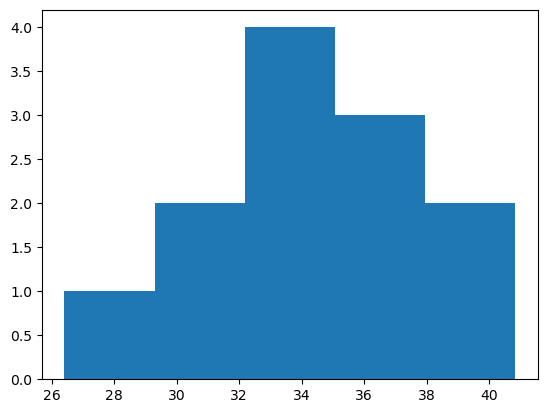

In [42]:
# check assumptions of one samp ttest
plt.hist(prev_12_weeks, bins=5)
plt.show()

The data appears normally distributed, and the observations are independent. Using a significance threshold of 0.05, we can reject the null and determine that there was not a significant drop in earnings over the past 2 weeks of work. However, we should consider the one sample t-test assumtpion violation this test does commits, as the sample was not randomly selected. In this context, this assumption can be reasonably dismissed, as the question being asked was about two specific records, and the entirety of the remaining sample pool was selected.

### Multiple Regression Analysis
We want to quanitfy the impact of key variables on earnings potential for a dasher. This is accomplished using multiple regression analysis.

<i><b>THIS TEST REQUIRES ADDITIONAL DATA FROM THE ONGOING PROCESS OF DATA COLLECTION AND WILL BE COMPLETED AT A LATER TIME. SEE NOTES BELOW TO UNDERSTAND HOW THIS TEST WILL BE CONDUCTED.</b></i>

### ANOVA Test
We want to determine if there is a significant difference in earnings potential based on which day of the week the dasher works, as well as the time of shift (lunch or dinner). To measure these variables, several ANOVA tests are conducted.

<i><b>THIS TEST REQUIRES ADDITIONAL DATA FROM THE ONGOING PROCESS OF DATA COLLECTION AND WILL BE COMPLETED AT A LATER TIME. SEE NOTES BELOW TO UNDERSTAND HOW THIS TEST WILL BE CONDUCTED.</b></i>

### Principle Component Analysis
<i><b>THIS TEST REQUIRES ADDITIONAL DATA FROM THE ONGOING PROCESS OF DATA COLLECTION AND WILL BE COMPLETED AT A LATER TIME. SEE NOTES BELOW TO UNDERSTAND HOW THIS TEST WILL BE CONDUCTED.</b></i>

## Conclusions
### Limitations of the Data
Overall, this project was completed as a showcase of my technical knowledge, as well as to provide insight into how I approach a data analytics problem. Going into this project, I was well aware of the limitations in the data, as well as the limited practical use of the findings.

This dataset is limited in a number of ways:
* The `weekly_earnings` data set consists of just 14 weeks of data
* The data is from a single dasher

I attempted to account for the issue of granularity by expanding the number of fields and collecting data beyond what is available directly from DoorDash. Aggregate columns were calculated to attempt to create a deeper understanding of potential relationships under the surface of the data.

Additionally, there are variables that could not be measured without a larger sample of dashers that, according to DoorDash policies, impact dasher earnings. These include whether or not a dasher has Top Dasher status, whether or not a dasher is part of the Large Order Program, and whether or not a dasher's ratings qualify them for higher-paying priority orders. The dasher in this data met all of these conditions for the duration of data collection, but without samples that met some or none of these conditions, these variables statistical significance cannot be measured.

If this analysis were to be conducted again, I would collect earnings data from the dasher's entire history of dashing. I would also include a sample of at least 40 dashers from several markets across the US. This would allow an expansion of the analysis to include geographical factors, as well the creation of segments for each group mentioned above (Top Dasher vs Non-Top Dasher, etc.). 

### Findings

<i><b>FINDINGS WILL BE REPORTED AFTER ONGOING DATA COLLECTION IS CONCLUDED.</b></i>